In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [11]:
# Load dataset.
train_df = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
eval_df = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')

In [14]:
train_df.duplicated().sum()

69

In [3]:
train_df["survived"].unique()

array([0, 1])

<Axes: xlabel='sex'>

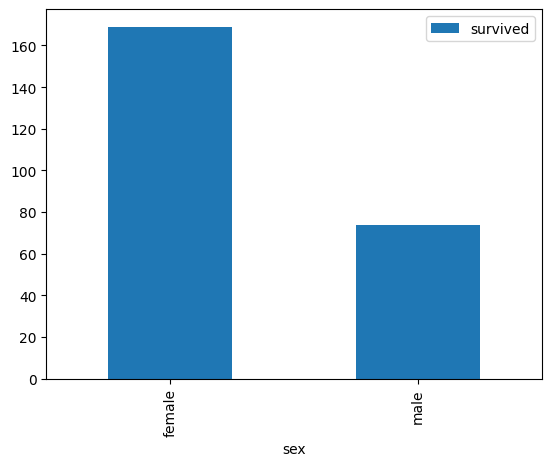

In [4]:
train_df[["sex", "survived"]].groupby("sex").sum().plot(kind="bar")

In [5]:
feature = [
    'sex', 'age', 'n_siblings_spouses', 'parch', 
    'fare', 'class', 'embark_town', 'alone'
]
X = train_df[feature]
y = train_df["survived"]

In [6]:
CATERGORY_COLUMNS=["sex","class","embark_town","alone"]
NUMBERIC_COLUMNS=["age","n_siblings_spouses","parch","fare"]

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'n_siblings_spouses'}>],
       [<Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

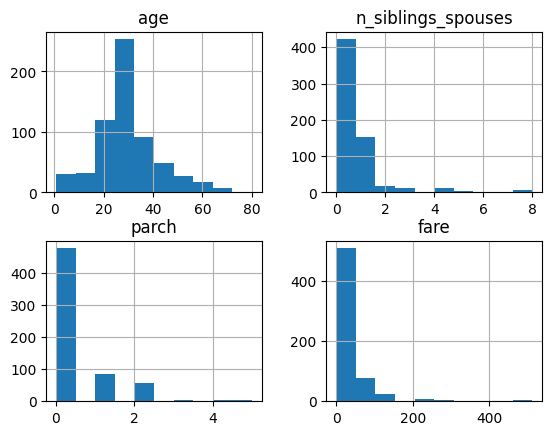

In [7]:
X[NUMBERIC_COLUMNS].hist()

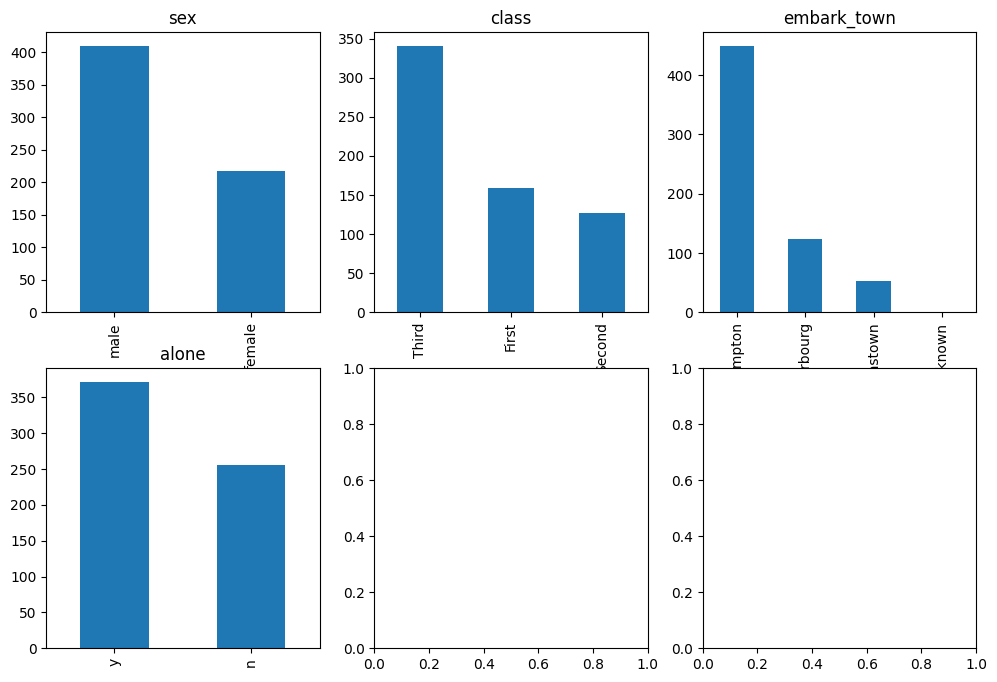

In [8]:
fig,axes = plt.subplots(ncols=3, nrows=2, figsize=(12,8))
for col, ax in zip(X.select_dtypes(include='O'), axes.ravel()):
    X[col].value_counts().plot(kind="bar", ax=ax, title=f"{col}")

plt.show()

**One hot encoder**

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
for cat in CATERGORY_COLUMNS:
  a = train_df[cat].unique()
  print(a)

['male' 'female']
['Third' 'First' 'Second']
['Southampton' 'Cherbourg' 'Queenstown' 'unknown']
['n' 'y']


In [11]:
train_df_category = train_df[CATERGORY_COLUMNS]
train_df_category

,sex,class,embark_town,alone
0,male,Third,Southampton,n
1,female,First,Cherbourg,n
2,female,Third,Southampton,y
3,female,First,Southampton,n
4,male,Third,Queenstown,y
...,...,...,...,...
622,male,Second,Southampton,y
623,male,Third,Southampton,y
624,female,First,Southampton,y
625,female,Third,Southampton,n


In [12]:
train_df = pd.get_dummies(train_df)
train_df

,survived,age,n_siblings_spouses,parch,fare,sex_female,sex_male,class_First,class_Second,class_Third,...,deck_E,deck_F,deck_G,deck_unknown,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_unknown,alone_n,alone_y
0,0,22.0,1,0,7.2500,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
1,1,38.0,1,0,71.2833,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,28.0,0,0,8.4583,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,0,28.0,0,0,10.5000,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
623,0,25.0,0,0,7.0500,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1
624,1,19.0,0,0,30.0000,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
625,0,28.0,1,2,23.4500,1,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0


In [13]:
y = train_df["survived"]
X = train_df.drop(labels=["survived"], axis=1)

In [14]:
# Include call back class to do early stopping
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callback = myCallback()

2023-09-16 07:45:40.024597: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-16 07:45:40.359409: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-16 07:45:40.361709: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-16 07:45:42.121185: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [17]:
# model_param = {
#     'svm': {
#         'model': SVC(gamma='auto', probability=True),
#         'params': {
#             'svc__C': [1, 10, 100, 1000],
#             'svc__kernel': ['rbf', 'linear']
#         }
#     },
#     'random_forest': {
#         'model': RandomForestClassifier(),
#         'params': {
#             'randomforestclassifier__n_estimators': [1, 5, 10]
#         }
#     },
#     'logistic_regression': {
#         'model': LogisticRegression(solver='liblinear', multi_class='auto'),
#         'params': {
#             'logisticregression__C': [1, 5, 10]
#         }
#     }
# }

In [18]:
# scores = []
# best_estimator = {}
# for algo, param in model_param.items():
#   pipeline = make_pipeline(StandardScaler(), param["model"])
#   clf = GridSearchCV(pipeline, param["params"], cv=5, return_train_score=False)
#   clf.fit(X_train, y_train)
#   scores.append({
#     "model": algo,
#     "best_score": clf.best_score_,
#     "best_param": clf.best_params_,
#     "test_score": clf.best_estimator_.score(X_test, y_test)
#   })
#   best_estimator[algo] = clf.best_estimator_

# report = pd.DataFrame(scores, columns=["model", "best_score", "best_params", "test_score"])
# report